## Observations and Insights

Observations:

1.- From the Sumary Statistics Table two of the treatments regimens seem very promising: Capomulin and Ramicane. Both drugs show the lowest mean, median, variance, standard deviation and standard error of the mean values of all drugs. Furthermore, the mean of tumor volumes for these 2 drugs are below the initial tumor volume at timepoint 0, which suggests a reduction on the size of the tumors.

2.- The Bar plots and IQR calculations also reveal how promising the Capomulin and Ramicane treatments can be. The bar plots show that a greater number of mice treated with Capomulin and Ramicane completed the study when compared against the other treatments. This suggests that both of these treatments are less toxic and perhaps since the tumors smaller the mice are allowed to continue in the treatment for longer periods of time. The IQR calculation for both treatment also show the lower and upper quartile values of Tumor Volume are below the initial tumor volume at timepoint 0.

3.- When looking at the Scatter Plot and Linear Regression of the mice weight against average tumor volume, we can notice a strong positive correlation between the 2 factors (r-squared value = 0.842)

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table=combined_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

Text(0, 0.5, 'Number of Data Points')

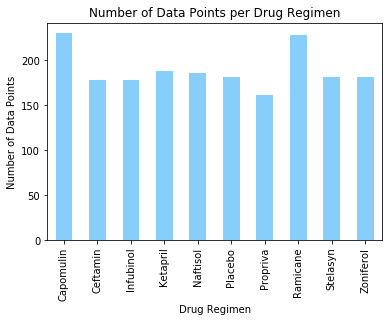

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#group main data by drug regimen
bar_data=combined_data.groupby(["Drug Regimen"])
#variable to store number of treatments
data_points=bar_data["Drug Regimen"].count()

#bar plot using pandas
data_points.plot(kind="bar", color='lightskyblue', y=data_points)

#labels
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

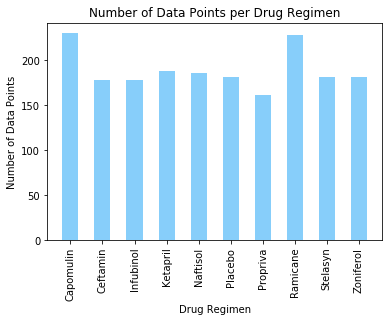

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#bar plot using pyplot
x_axis = np.arange(len(data_points))
plt.bar(x_axis, data_points, alpha=1, color='lightskyblue', width=0.5, align='center')

#tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, data_points.index, rotation='vertical')

#labels
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


## Pie plots

(-1.1356882769356003,
 1.1105810168389947,
 -1.1351892454007113,
 1.1108711653747656)

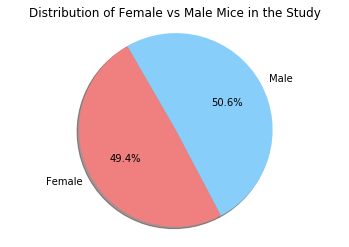

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#group main data by mice gender
pie_data=combined_data.groupby(["Sex"])
#variable to store numbers per gender
pie_points=pie_data["Sex"].count()

#pie parameters
labels = pie_points.index
sizes = pie_points
colors = ['lightcoral', 'lightskyblue']

#pie plot using pandas
pie_points.plot.pie(y="pie_points", autopct="%1.1f%%", labels=labels, startangle=120, shadow=True, colors=colors)

#labels
plt.title("Distribution of Female vs Male Mice in the Study")
plt.ylabel("")
plt.axis("equal")

(-1.1356882769356003,
 1.1105810168389947,
 -1.1351892454007113,
 1.1108711653747656)

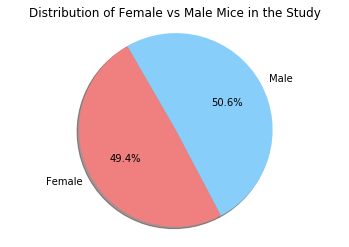

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#pie plot using pyplot
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

#labels
plt.title("Distribution of Female vs Male Mice in the Study")
plt.axis("equal")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#original data merged using Mouse ID
final_vol_data=pd.merge(study_results,mouse_metadata, on="Mouse ID", how="inner")

#data set with needed columns: "Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"
final_vol_table=final_vol_data[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]

#data set only with the last timepoint for each mice
final_vol_df=final_vol_table.groupby("Mouse ID").tail(1)

#index the dataset by drug regimen
final_vol_df=final_vol_df.set_index(["Drug Regimen"], inplace=False)

#filter the dataset only by the promising treatment regimens
final_vol_drug=final_vol_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
final_vol_drug.head()


,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,b128,45,38.982878
Capomulin,j246,35,38.753265
Capomulin,r554,45,32.377357
Capomulin,s185,45,23.343598
Capomulin,b742,45,38.939633


In [8]:
#calculate IQR
quartiles_capomulin=final_vol_drug.loc["Capomulin","Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles_capomulin[0.25]
upperq = quartiles_capomulin[0.75]
iqr = upperq-lowerq

#priting results
print("Results for Capomulin:")
print("-------------------------------------------------")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles_capomulin[0.5],2)} ")

#calculate outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

Results for Capomulin:
-------------------------------------------------
The lower quartile of Tumor Volume is: 32.38
The upper quartile of Tumor Volume is: 40.16
The interquartile range of Tumor Volume is: 7.78
The the median of Tumor Volume is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [9]:
#calculate IQR
quartiles_Ramicane=final_vol_drug.loc["Ramicane","Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles_Ramicane[0.25]
upperq = quartiles_Ramicane[0.75]
iqr = upperq-lowerq

#priting results
print("Results for Ramicane:")
print("-------------------------------------------------")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles_Ramicane[0.5],2)} ")

#calculate outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")


Results for Ramicane:
-------------------------------------------------
The lower quartile of Tumor Volume is: 31.56
The upper quartile of Tumor Volume is: 40.66
The interquartile range of Tumor Volume is: 9.1
The the median of Tumor Volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [10]:
#calculate IQR
quartiles_Infubinol=final_vol_drug.loc["Infubinol","Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles_Infubinol[0.25]
upperq = quartiles_Infubinol[0.75]
iqr = upperq-lowerq

#priting results
print("Results for Infubinol:")
print("-------------------------------------------------")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles_Infubinol[0.5],2)} ")

#calculate outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

Results for Infubinol:
-------------------------------------------------
The lower quartile of Tumor Volume is: 54.05
The upper quartile of Tumor Volume is: 65.53
The interquartile range of Tumor Volume is: 11.48
The the median of Tumor Volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [11]:
#calculate IQR
quartiles_Ceftamin=final_vol_drug.loc["Ceftamin","Tumor Volume (mm3)"].quantile([.25,.5,.75])

lowerq = quartiles_Ceftamin[0.25]
upperq = quartiles_Ceftamin[0.75]
iqr = upperq-lowerq

#priting results
print("Results for Ceftamin:")
print("-------------------------------------------------")
print(f"The lower quartile of Tumor Volume is: {round(lowerq,2)}")
print(f"The upper quartile of Tumor Volume is: {round(upperq,2)}")
print(f"The interquartile range of Tumor Volume is: {round(iqr,2)}")
print(f"The the median of Tumor Volume is: {round(quartiles_Ceftamin[0.5],2)} ")

#calculate outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

Results for Ceftamin:
-------------------------------------------------
The lower quartile of Tumor Volume is: 48.72
The upper quartile of Tumor Volume is: 64.3
The interquartile range of Tumor Volume is: 15.58
The the median of Tumor Volume is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


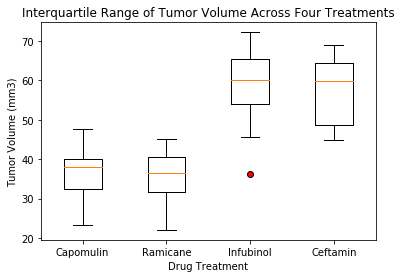

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Calculations for all box plots filtering by drug regimen and tumor volume
box_capomulin=final_vol_drug.loc["Capomulin","Tumor Volume (mm3)"]
box_Ramicane=final_vol_drug.loc["Ramicane","Tumor Volume (mm3)"]
box_Infubinol=final_vol_drug.loc["Infubinol","Tumor Volume (mm3)"]
box_Ceftamin=final_vol_drug.loc["Ceftamin","Tumor Volume (mm3)"]

#set of 4 subplots
box1 = box_capomulin, box_Ramicane, box_Infubinol, box_Ceftamin

#box plot and labels
fig1, ax1 = plt.subplots()
ax1.set_title('Interquartile Range of Tumor Volume Across Four Treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Treatment')
red_outliers = dict(markerfacecolor='r')

#x-axis ticks
plt.xticks([], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

#show box plot
ax1.boxplot(box1, flierprops=red_outliers)
plt.show()

## Line and scatter plots

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#mouse to use is:"s185". Original data indexed by Mouse ID
line_data=combined_data.set_index(["Mouse ID"], inplace=False)

#dataset filtered to only show mouse s185
s185_data=line_data.loc["s185"]
s185_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
s185,Capomulin,Female,3,17,25,33.949940,0
s185,Capomulin,Female,3,17,30,32.959671,1
s185,Capomulin,Female,3,17,35,28.328531,1
s185,Capomulin,Female,3,17,40,25.472143,1


(0, 45)

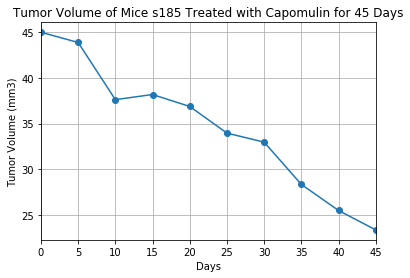

In [14]:
#calculations for x-axis
x_s185_data=s185_data["Timepoint"]
#calculations for y-axis
y_s185_data=s185_data["Tumor Volume (mm3)"]
#line plot
plt.plot(x_s185_data, y_s185_data, 'o-')

#line plot labels and other parameters
plt.title("Tumor Volume of Mice s185 Treated with Capomulin for 45 Days")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.xlim(0, 45)

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Original data indexed by drug treatment
weight_vol_data=combined_data.set_index(["Drug Regimen"], inplace=False)

#New dataset filtered by drug treatment Capomulin
weight_vol_table=weight_vol_data.loc["Capomulin"]
weight_vol_table.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,0,45.000000,0
Capomulin,s185,Female,3,17,5,43.878496,0
Capomulin,s185,Female,3,17,10,37.614948,0
Capomulin,s185,Female,3,17,15,38.177232,0
Capomulin,s185,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Average Tumor Volume (mm3)')

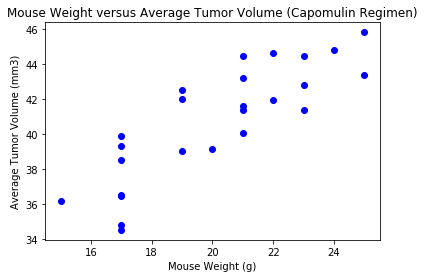

In [16]:
#calculations for x-axis
x_weight_vol=weight_vol_table.groupby(["Mouse ID"])["Weight (g)"].mean()
#calculations for y-axis
y_weight_vol=weight_vol_table.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

#scatter plot
plt.scatter(x_weight_vol, y_weight_vol, marker="o", color="blue")

#labels
plt.title("Mouse Weight versus Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_weight_vol,y_weight_vol)
print(f"The correlation between Mouse Weight and Average Tumor Volume is {round(correlation[0],3)}")

The correlation between Mouse Weight and Average Tumor Volume is 0.842


The r-squared is: 0.842


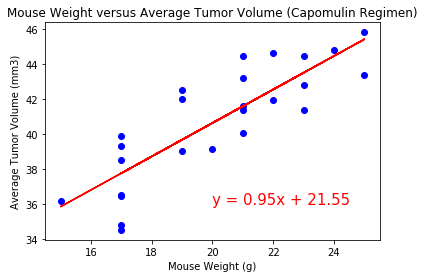

In [18]:
#Calculation for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_weight_vol, y_weight_vol)
regress_values = x_weight_vol * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Duplicate of scatter plot above
plt.scatter(x_weight_vol, y_weight_vol, marker="o", color="blue")

#Line plot with linear regression
plt.plot(x_weight_vol,regress_values,"r-")

#Anotation inside the graph to show line equation including the slope of line
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

#labels
plt.title("Mouse Weight versus Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#show r-squared value
print(f"The r-squared is: {round(rvalue,3)}")